In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.random.set_seed(42)

In [4]:
data = pd.read_csv("train.csv")
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = data.drop("label", axis=1).values
Y = data["label"].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
X = X / 255.0

# Reshape to (num_samples, 28, 28)
X = X.reshape(-1, 28, 28)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
px = X_test[90]
px

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
py = Y_test[90]
py

np.int64(9)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8136 - loss: 0.6221 - val_accuracy: 0.9423 - val_loss: 0.1992
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9494 - loss: 0.1664 - val_accuracy: 0.9508 - val_loss: 0.1562
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9656 - loss: 0.1136 - val_accuracy: 0.9558 - val_loss: 0.1431
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9737 - loss: 0.0845 - val_accuracy: 0.9575 - val_loss: 0.1442
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9804 - loss: 0.0642 - val_accuracy: 0.9604 - val_loss: 0.1399
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9860 - loss: 0.0494 - val_accuracy: 0.9574 - val_loss: 0.1451
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9879 - loss: 0.0405 - val_accuracy: 0.9583 - val_loss: 0.1468
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9912 - loss: 0.0308 - 

In [13]:
px.shape

(28, 28)

In [14]:
X_train.shape

(33600, 28, 28)

In [16]:
px=px.reshape(1, 28, 28)

In [17]:
prediction = model.predict(px)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[2.9475260e-07, 4.9975857e-10, 6.2563588e-05, 1.6483569e-05,
        1.3799792e-07, 1.7011201e-08, 3.4127769e-08, 5.9527179e-09,
        1.6588873e-06, 9.9991882e-01]], dtype=float32)

In [18]:
pred_label = np.argmax(prediction)
pred_label

np.int64(9)

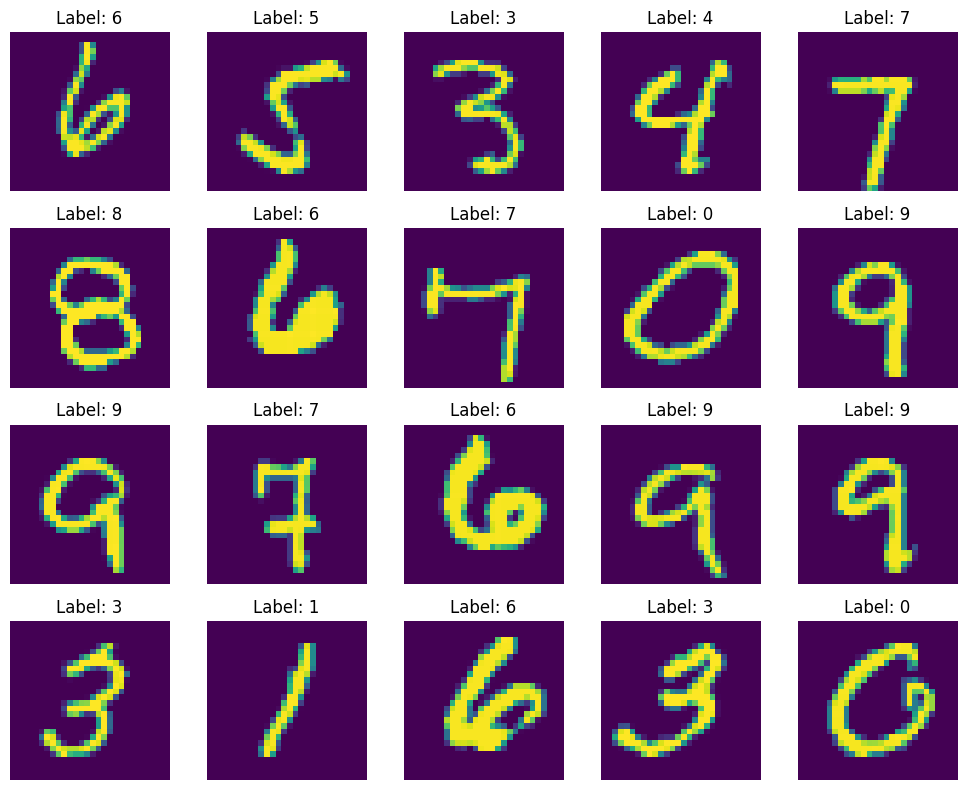

In [23]:

# Create a figure and a grid of subplots (e.g., 4 rows, 5 columns to fit 20 images)
fig, axes = plt.subplots(4, 5, figsize=(10, 8)) 

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the images and display each one in a subplot
for i, image in enumerate(X_train[:20]):
    axes[i].imshow(image)
    axes[i].axis('off') # Hide axes for cleaner display
    axes[i].set_title(f"Label: {Y_train[i]}") # Set the title for each subplot

plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() 